In [1]:
"""
심화 학습: 서포트 벡터 머신 (Support Vector Machine, SVM)

분류와 회귀 분석에 모두 사용할 수 있느 강력하고 유연한 지도 학습 알고리즘
""";

%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from scipy import stats
# Seaborn 플로팅 기본 설정
import seaborn as sns; sns.set()

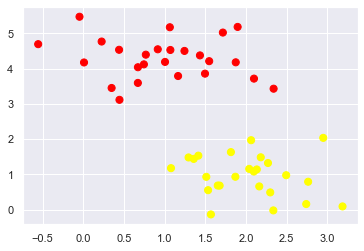

In [2]:
# 나이브 베이즈 분류 -> 생성 분류
# 서포트 벡터 머신 -> 판별 분류 (discriminative classification)
# 간단히 클래스를 서로 나누는 선이나 곡선, 다양체를 구할 것

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn");

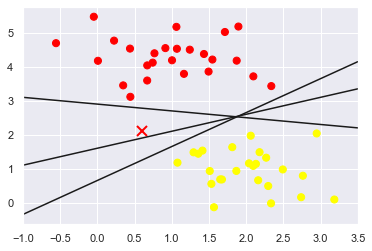

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2,
         markersize=10)

slope = [1, 0.5, -0.2]
intercept = [0.65, 1.6, 2.9]

for m, b in list(zip(slope, intercept)):
    plt.plot(xfit, m * xfit + b, "-k")
plt.xlim(-1, 3.5);

# 세 개의 구분자는 표본들 사이를 완벽하게 판별한다.
# 하지만 어느 것을 선택하느냐에 따라 새로운 데이터 점(X)에 할당하는 레이블이 달라진다

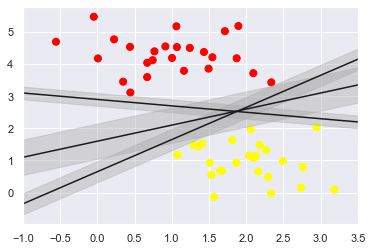

In [4]:
# 서포트 벡터 머신: 마진 최대화
# 각 선에서 주변의 가장 가까운 점에 이르는 너비의 마진(margin)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

slope = [1, 0.5, -0.2]
intercept = [0.65, 1.6, 2.9]
dist = [0.33, 0.55, 0.2]

for m, b, d in list(zip(slope, intercept, dist)):
    yfit = m * xfit + b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor="none",
                     color="#AAAAAA", alpha=0.4)
    
plt.xlim(-1, 3.5);

# 서포트 벡터 머신에서는 이 마진(margin)을 극대화하는 선이 최적의 모델
# 서포트 벡터 머신은 이러한 최대 마진 추정기의 대표적인 예

In [5]:
# 서포트 벡터 머신 적합하기
# 선형 커널을 사용하고 모수 C에 매우 큰 수를 설정
from sklearn.svm import SVC # support vector machine
model = SVC(kernel="linear", C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

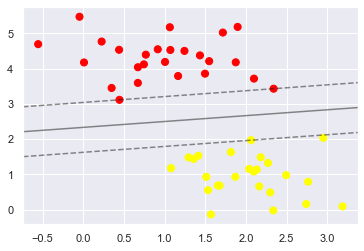

In [6]:
# SVM 결정 경계를 플로팅할 간단한 함수
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """ 2차원 SVC를 위한 의사결정 함수 플로팅하기 """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 평가를 위한 그리드 생성
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 의사결정 경계와 마진 플로팅
    ax.contour(X, Y, P, colors="k",
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=["--", "-", "--"])
    # 서포트 벡터 플로팅
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors="none");
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(model);

# 일부 훈련 데이터 점이 마진에 닿아 있음 => 이 적합의 중심 원소로서 서포트 벡터(support vectors)
model.support_vectors_

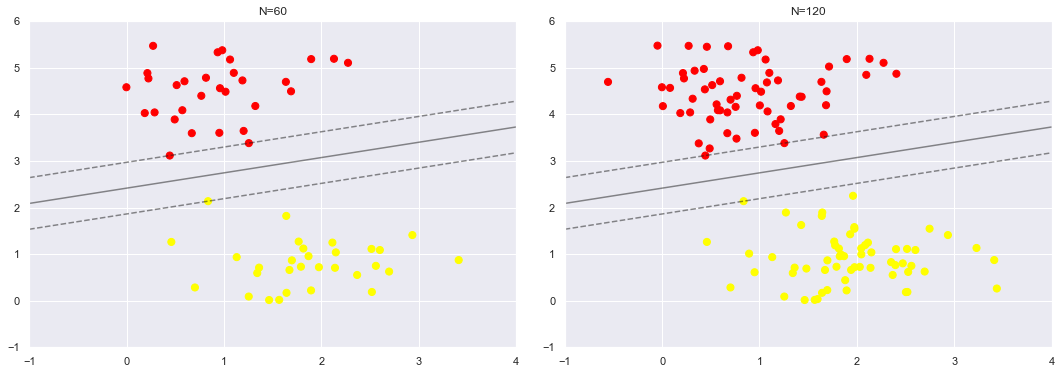

In [7]:
# 첫 60개의 점으로부터 학습한 모델과 120개의 점으로부터 학습한 모델 플로팅
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    
    model = SVC(kernel="linear", C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title("N={0}".format(N))
    
# 마진에서 떨어진 점들의 정확한 행위에 무감각한 SVM 모델

In [8]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

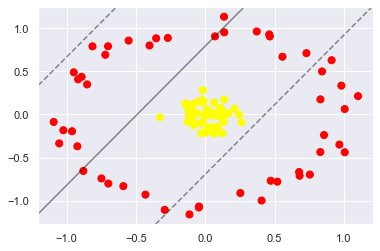

In [9]:
# 선형 경계 너머: 커널 SVM
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf, plot_support=False);

# 선형 판별법은 이 데이터를 구분해낼 수 없다

In [10]:
# 방사형 기저 함수 (radial basis function, RBF)
r = np.exp(-(X ** 2).sum(1))

# 3차원 플롯을 사용해 시각화
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    
    interact(plot_3D, elev=[-90, 90], azim=(-180, 180),
             X=fixed(X), y=fixed(y))

# plot_3D()

In [11]:
# RBF 커널을 SVM에 적용
clf = SVC(kernel="rbf", C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

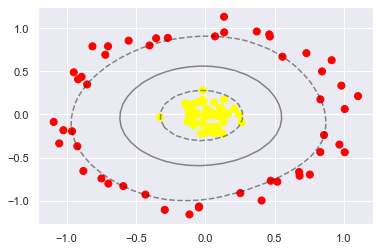

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors="none");

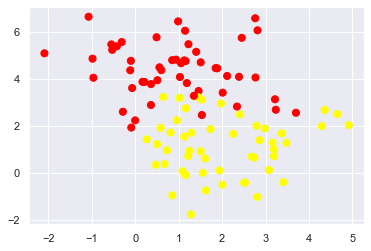

In [13]:
# SVM 조정하기: 마진을 부드럽게 (soft margin)
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn");

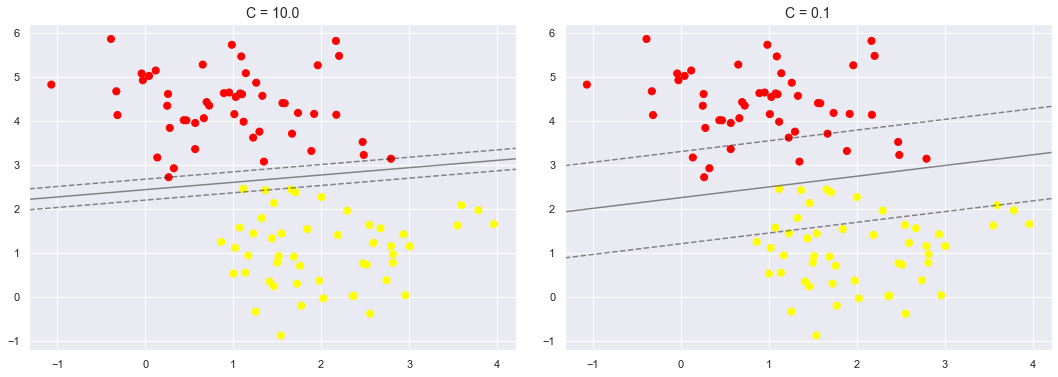

In [14]:
# 마진의 강도는 C로 알려진 조정 모수에 의해 제어
"""
C가 매우 크면 마진이 단단해 점들이 그 안에 존재할 수 없다 (overfit)
C가 매우 작으면 마진이 부드러워 일부 점이 그 안에 포함되도록 마진이 커질 수 있다 (underfit)
=> allow misclassification
""";

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors="none")
    axi.set_title("C = {0:.1f}".format(C), size=14)

In [16]:
# 예제: 안면 인식
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


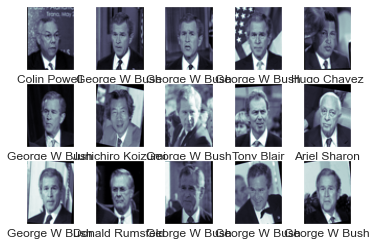

In [22]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="bone")
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [27]:
# 주성분 분석을 사용해 서포트 벡터 머신 분류기에 넣을 150개의 핵심 성분 추출
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [30]:
# 훈련 데이터와 시험 데이터로 나누기
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target, random_state=42)

In [33]:
# 그리드 검색 교차 검증, 모수의 조합 탐색
from sklearn.model_selection import GridSearchCV
param_grid = {"svc__C": [1, 5, 10, 50],
              "svc__gamma": [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 1min 24s
Wall time: 28.8 s
{'svc__C': 50, 'svc__gamma': 0.005}


In [34]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

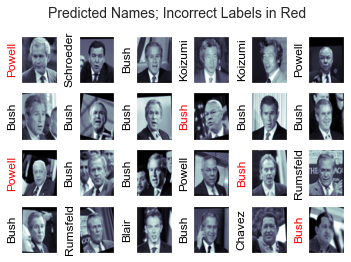

In [35]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap="bone")
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                                      color="black" if yfit[i] == ytest[i] else "red")
    fig.suptitle("Predicted Names; Incorrect Labels in Red", size=14);
                              

In [37]:
# 레이블 단위로 복구에 대한 통계랑을 열거한 분류 리포트
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.84      0.85      0.85        68
  Donald Rumsfeld       0.72      0.58      0.64        31
    George W Bush       0.76      0.92      0.83       126
Gerhard Schroeder       0.75      0.65      0.70        23
      Hugo Chavez       1.00      0.45      0.62        20
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.80      0.76      0.78        42

         accuracy                           0.80       337
        macro avg       0.84      0.71      0.76       337
     weighted avg       0.80      0.80      0.79       337



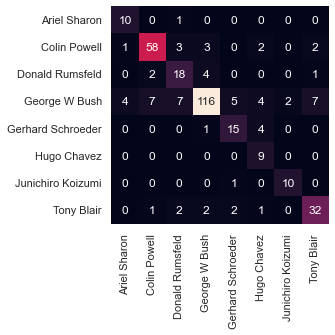

In [39]:
# 클래스들 사이의 오차 행렬
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=faces.target_names, yticklabels=faces.target_names);